## HW4

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math

# Change the seed to get different random numbers
np.random.seed(1)

### Problem 2.1: PCA for dimension reduction (3 Points)

In this problem you will approximately reconstruct images by simplifying them to multiples of a few principal components.

Note: When you display the images, use the color map `cmap=plt.cm.gray.reversed()` for MNIST.

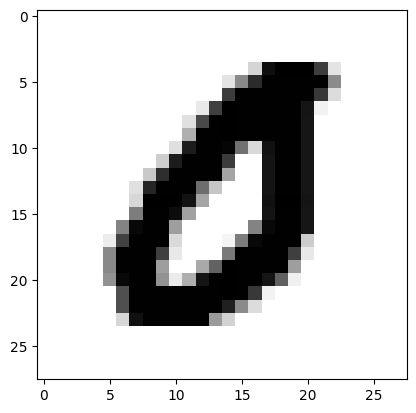

In [ ]:
(x, y), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x = x.reshape([60000, 28*28])
zeros = np.where(y==0)[0]
x_zeros = x[zeros,:]
y = y[zeros]
my_image = np.random.randint(0, len(y), size=1)

plt.imshow(x_zeros[my_image,:].reshape((28,28)), cmap=plt.cm.gray.reversed())

For $k = 0, 10, 20, 30, 40, 49$, use $k$-th principal components for MNIST $0$'s to approximately reconstruct the image selected above. Noting that we index from 0, namely 0-th pricipal component is the first one. Display the reconstruction for each value of $k$. To display the set of images compactly, you may want to use the 'plot_images' function defined below.

In [ ]:
def plot_images(images, titles, h, w, n_row=3, n_col=4, reversed=False):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        if i >= len(images):
            break
        plt.subplot(n_row, n_col, i + 1)
        if reversed:
            plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        else:
            plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray.reversed())
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

Variance explained by 0th principal vector: 17.47%
Variance explained by 10th principal vector: 1.99%
Variance explained by 20th principal vector: 0.81%
Variance explained by 30th principal vector: 0.45%
Variance explained by 40th principal vector: 0.29%
Variance explained by 49th principal vector: 0.21%


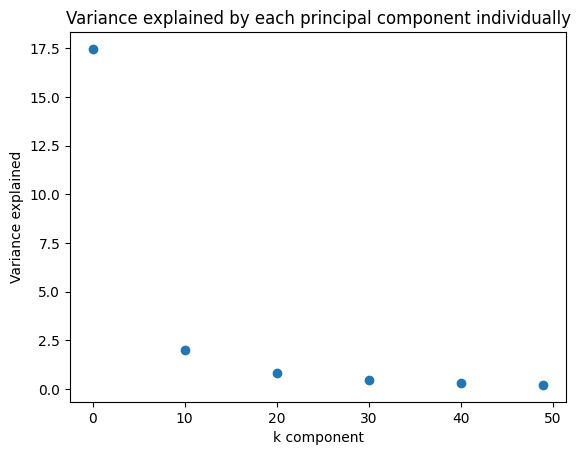

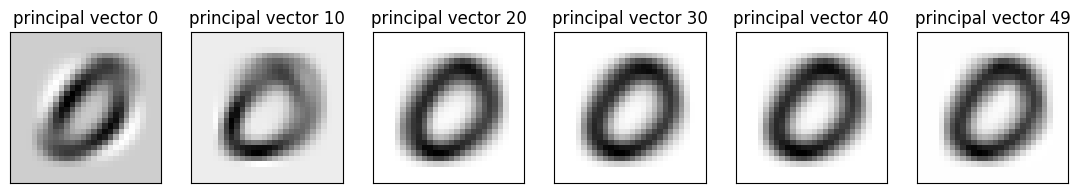

In [ ]:
from sklearn.decomposition import PCA

height = 28
width = 28

num_components = 50

# Compute the average image
average_image = np.mean(x_zeros, axis=0)
# Perform PCA
pca = PCA(n_components=50) # Adjust the number of components as needed
pca.fit(x_zeros)
#Get selected images
selected_image = x_zeros[my_image[0]]

# Function to reconstruct image using the k-th principal component
def reconstruct_image(k, image):
    phi_k = pca.components_[k]
    image_projection = np.dot(image - average_image, phi_k)
    return average_image + image_projection * phi_k

# Display the reconstructions for each k
k_values = [0, 10, 20, 30, 40, 49]
labels = ['principal vector %d' % k for k in k_values]
reconstructed_images = []
variances= []
for k in k_values:
    reconstructed_image = reconstruct_image(k, selected_image).reshape(28, 28)
    reconstructed_images.append(reconstructed_image)

    # Print variance explanation for the k-th vector
    variance_explained = pca.explained_variance_ratio_[k] * 100  # variance explained by the k-th vector
    print('Variance explained by %dth principal vector: %.2f%%' % (k, variance_explained))
    variances.append(variance_explained)

plt.xlabel('k component')
plt.ylabel('Variance explained')
plt.title('Variance explained by each principal component individually')
plt.scatter(k_values,variances)
plot_images(reconstructed_images, labels, 28, 28, n_row=1, n_col=len(k_values), reversed=False)

EXPLANATION


> As we can see, when we use k = 0 the reconstructed image looks most similar to our original image. This is due to the first principal component explaining most of the variance in the data, as shown in the graph of variance explained vs. k value.



### Problem 2.2: PCA for classification (7 Points)

#### Part (a)

In [ ]:
from sklearn.linear_model import LogisticRegression
#load MNIST dataset
(x, y), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
#flatten the image
x = x.reshape([60000, 28*28])

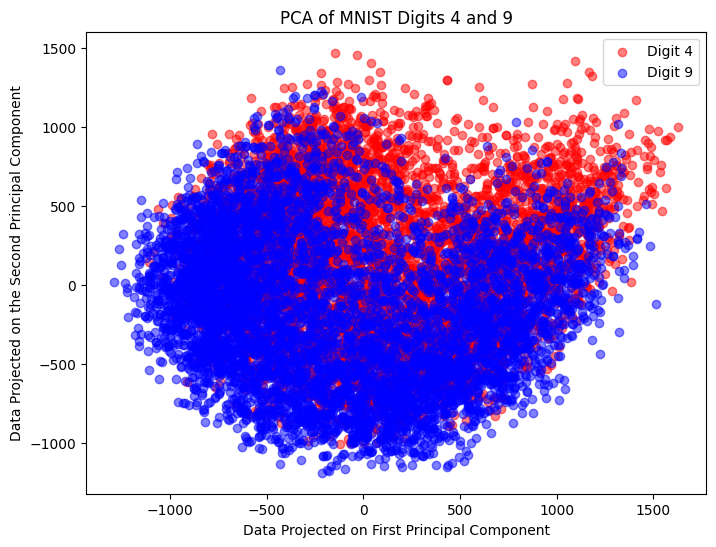

In [ ]:
# Find indices where the label is either 4 or 9
indices = np.where((y == 4) | (y == 9))[0]

# Create the subset containing only images with labels 4 or 9
x_subset = x[indices]
y_subset = y[indices]

# Perform PCA to reduce data to 2 dimensions
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_subset)

# Extract the coordinates of the projected data
x0 = x_pca[y_subset == 4, 0]  # First component for digit 4
y0 = x_pca[y_subset == 4, 1]  # Second component for digit 4
x1 = x_pca[y_subset == 9, 0]  # First component for digit 9
y1 = x_pca[y_subset == 9, 1]  # Second component for digit 9

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(x0, y0, color='red', alpha=0.5, label='Digit 4')
plt.scatter(x1, y1, color='blue', alpha=0.5, label='Digit 9')
plt.xlabel('Data Projected on First Principal Component')
plt.ylabel('Data Projected on the Second Principal Component')
plt.title('PCA of MNIST Digits 4 and 9')
plt.legend()
plt.show()


EXPLANATION
> We observed each number as a dot on the scatter plot. As we can see, the scatter plot for the numbers 4 and 9 is not completely separable into two clusters. This is probably because 4 and 9 look alike with the closed loop on the top of the digit. Since the two clusters are not clearly separable, training a machine learning algorithm to classify 4 and 9 would be hard.


#### Part (b)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


# Load the MNIST dataset
(x, y), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Flatten the images
x = x.reshape((60000, 28*28))


# Filter out all the images that are not 4 or 9
indices = np.where((y == 4) | (y == 9))
x_subset = x[indices]
y_subset = y[indices]


# Encode the labels for binary classification: 4 becomes 0, 9 becomes 1
y_encoded = np.where(y_subset == 4, 0, 1)


accuracies = []

for k_components in range (2,16):

  # Perform PCA to reduce the data to 'k' principal components
  pca = PCA(n_components=k_components)
  x_pca = pca.fit_transform(x_subset)
  print('x pca shape')
  print(x_pca.shape)

  # Split the data into training and testing sets
  x_train, x_test, y_train, y_test = train_test_split(x_pca, y_encoded, test_size=0.2, random_state=42)

  # Initialize the logistic regression model
  logistic_model = LogisticRegression(solver='lbfgs', max_iter=1000)

  # Train the model using the training data
  logistic_model.fit(x_train, y_train)

  # Predict on the test set
  y_pred = logistic_model.predict(x_test)

  # Calculate the accuracy
  accuracy = accuracy_score(y_test, y_pred)
  accuracies.append(accuracy)
  print(f"Accuracy: {accuracy:.2f}")

  # Print a detailed classification report
  report = classification_report(y_test, y_pred, target_names=['Digit 4', 'Digit 9'])
  print(report)


x pca shape
(11791, 2)
Accuracy: 0.63
              precision    recall  f1-score   support

     Digit 4       0.62      0.63      0.62      1145
     Digit 9       0.64      0.64      0.64      1214

    accuracy                           0.63      2359
   macro avg       0.63      0.63      0.63      2359
weighted avg       0.63      0.63      0.63      2359

x pca shape
(11791, 3)
Accuracy: 0.65
              precision    recall  f1-score   support

     Digit 4       0.64      0.65      0.65      1145
     Digit 9       0.67      0.65      0.66      1214

    accuracy                           0.65      2359
   macro avg       0.65      0.65      0.65      2359
weighted avg       0.65      0.65      0.65      2359

x pca shape
(11791, 4)
Accuracy: 0.69
              precision    recall  f1-score   support

     Digit 4       0.68      0.69      0.68      1145
     Digit 9       0.70      0.70      0.70      1214

    accuracy                           0.69      2359
   macro avg  

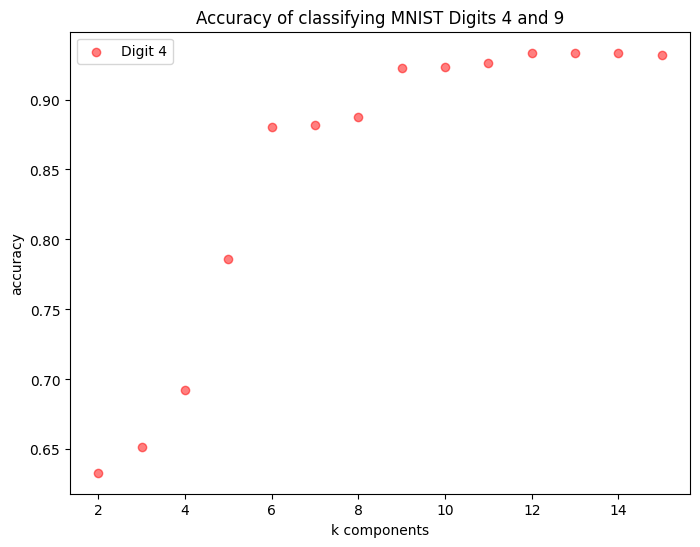

In [26]:

k = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
# Plot
plt.figure(figsize=(8, 6))
plt.scatter(k,accuracies, color='red', alpha=0.5, label='Digit 4')
plt.xlabel('k components')
plt.ylabel('accuracy')
plt.title('Accuracy of classifying MNIST Digits 4 and 9')
plt.legend()
plt.show()

  EXPLANATION
  

> We observe that for higher k values, the accuracy is higher. Then for values greater than k= 9, the accuracy stops increasing (plateaus). The plot makes sense, because when we use more principal components (higher k values) we are using more information to describe the numbers 4 and 9, which can make it easier to tell the numbers apart. And the accuracy stops increasing forever because at a certain point more information may not help to discern both numbers, as the bottleneck may be in another area, such as the limitations of logistic regression.

